<a href="https://colab.research.google.com/github/DanielRaiicHu/challenge1-data-science-latam/blob/main/AluraStoreLatam.ipynb" target="_blank">
  <img src="https://github.com/DanielRaiicHu/challenge1-data-science-latam/raw/main/enlace-colab.svg" alt="Abrir en Colab" width="200">
</a>


### Importación de datos



In [2]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


#1. Análisis de facturación



In [4]:
# Leer los archivos CSV
tienda1 = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

# Calcular el ingreso total por tienda
ingreso1 = tienda1['Precio'].sum()
ingreso2 = tienda2['Precio'].sum()
ingreso3 = tienda3['Precio'].sum()
ingreso4 = tienda4['Precio'].sum()

# Mostrar resultados
print(f'Ingreso total Tienda 1: ${ingreso1:,.0f}')
print(f'Ingreso total Tienda 2: ${ingreso2:,.0f}')
print(f'Ingreso total Tienda 3: ${ingreso3:,.0f}')
print(f'Ingreso total Tienda 4: ${ingreso4:,.0f}')

Ingreso total Tienda 1: $1,150,880,400
Ingreso total Tienda 2: $1,116,343,500
Ingreso total Tienda 3: $1,098,019,600
Ingreso total Tienda 4: $1,038,375,700


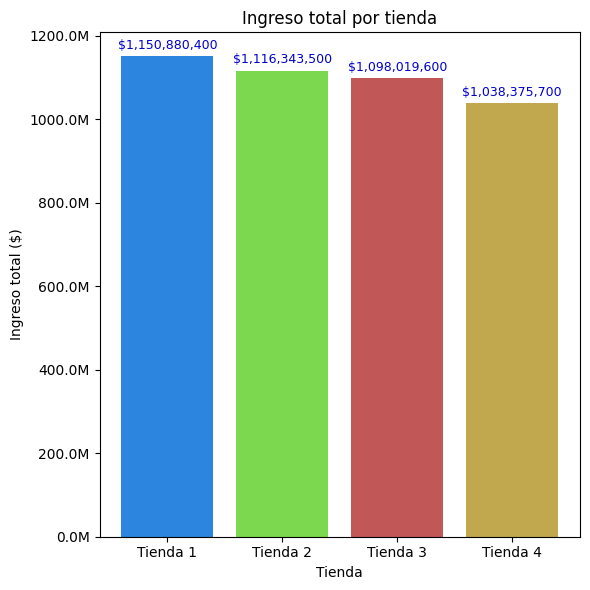

In [82]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

ingresos = [ingreso1, ingreso2, ingreso3, ingreso4]
tiendas = ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4']

# Tonos de azul para las barras
colores = ['#2C85DE', '#7CD84E', '#C15757', '#C1A84F']

plt.figure(figsize=(6, 6))
barras = plt.bar(tiendas, ingresos, color=colores)

# Título y etiquetas de ejes
plt.title('Ingreso total por tienda')
plt.xlabel('Tienda')
plt.ylabel('Ingreso total ($)')

# Eje Y en millones
formatter = mtick.FuncFormatter(lambda x, _: f'{x/1e6:.1f}M')
plt.gca().yaxis.set_major_formatter(formatter)

# Agregar valores sobre cada barra, en azul Mario, sin negrita
for barra in barras:
    altura = barra.get_height()
    plt.text(
        barra.get_x() + barra.get_width() / 2,
        altura + (altura * 0.01),  # un poco sobre la barra
        f"${int(altura):,}",
        ha='center',
        va='bottom',

        fontsize=9,
        color='#0000CD'  # azul estilo Mario fuerte
    )

plt.tight_layout()
plt.show()



# 2. Ventas por categoría

In [58]:
# Función para mostrar categorías más vendidas y total por tienda
def productos_por_categoria(df, nombre_tienda):
    conteo = df['Categoría del Producto'].value_counts()
    total = conteo.sum()

    print("\n::::::::::::::::::::::::::::::::::::::::::::::::")
    print(f'Categorías más vendidas en {nombre_tienda}:')
    print(conteo.to_string())
    print(f'Total de productos vendidos en {nombre_tienda}: {total}')

    return conteo

# Mostrar resultados por tienda

cat1 = productos_por_categoria(tienda1, "Tienda 1")
cat2 = productos_por_categoria(tienda2, "Tienda 2")
cat3 = productos_por_categoria(tienda3, "Tienda 3")
cat4 = productos_por_categoria(tienda4, "Tienda 4")


::::::::::::::::::::::::::::::::::::::::::::::::
Categorías más vendidas en Tienda 1:
Categoría del Producto
Muebles                    465
Electrónicos               448
Juguetes                   324
Electrodomésticos          312
Deportes y diversión       284
Instrumentos musicales     182
Libros                     173
Artículos para el hogar    171
Total de productos vendidos en Tienda 1: 2359

::::::::::::::::::::::::::::::::::::::::::::::::
Categorías más vendidas en Tienda 2:
Categoría del Producto
Muebles                    442
Electrónicos               422
Juguetes                   313
Electrodomésticos          305
Deportes y diversión       275
Instrumentos musicales     224
Libros                     197
Artículos para el hogar    181
Total de productos vendidos en Tienda 2: 2359

::::::::::::::::::::::::::::::::::::::::::::::::
Categorías más vendidas en Tienda 3:
Categoría del Producto
Muebles                    499
Electrónicos               451
Juguetes            

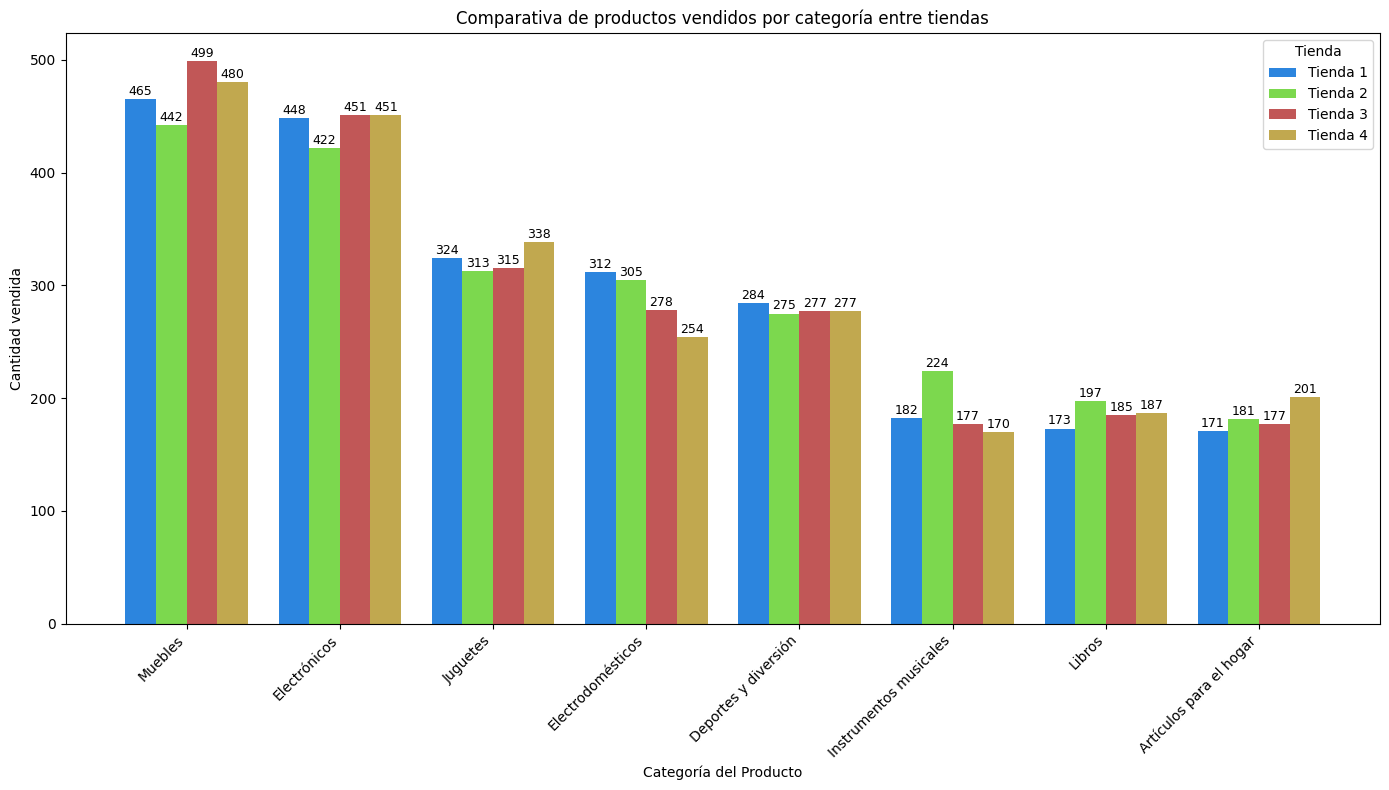

In [87]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Contar por categoría y tienda
def contar_por_categoria(df, nombre_tienda):
    return df['Categoría del Producto'].value_counts().rename(nombre_tienda)

# Obtener los conteos
cat1 = contar_por_categoria(tienda1, 'Tienda 1')
cat2 = contar_por_categoria(tienda2, 'Tienda 2')
cat3 = contar_por_categoria(tienda3, 'Tienda 3')
cat4 = contar_por_categoria(tienda4, 'Tienda 4')

# Combinar en un DataFrame
df_categorias = pd.concat([cat1, cat2, cat3, cat4], axis=1).fillna(0).astype(int)
df_categorias = df_categorias.loc[df_categorias.sum(axis=1).sort_values(ascending=False).index]

# Datos para el gráfico
categorias = df_categorias.index
n_tiendas = len(df_categorias.columns)
x = np.arange(len(categorias))
width = 0.2

# Colores personalizados
colores = ['#2C85DE', '#7CD84E', '#C15757', '#C1A84F']

plt.figure(figsize=(14, 8))

for i, (tienda, color) in enumerate(zip(df_categorias.columns, colores)):
    valores = df_categorias[tienda].values
    posiciones = x + (i - n_tiendas/2) * width + width / 2
    barras = plt.bar(posiciones, valores, width=width, label=tienda, color=color)

    # Etiquetas sobre las barras
    for bar in barras:
        altura = bar.get_height()
        plt.text(bar.get_x() + bar.get_width() / 2, altura + 1, str(altura),
                 ha='center', va='bottom', fontsize=9)

# Formato del gráfico
plt.xticks(x, categorias, rotation=45, ha='right')
plt.title('Comparativa de productos vendidos por categoría entre tiendas')
plt.xlabel('Categoría del Producto')
plt.ylabel('Cantidad vendida')
plt.legend(title='Tienda')
plt.tight_layout()
plt.show()



# 3. Calificación promedio de la tienda


In [50]:
promedio1 = tienda1['Calificación'].mean()
promedio2 = tienda2['Calificación'].mean()
promedio3 = tienda3['Calificación'].mean()
promedio4 = tienda4['Calificación'].mean()

print("Calificación promedio por tienda:")
print(f"Tienda 1: {promedio1:.2f}")
print(f"Tienda 2: {promedio2:.2f}")
print(f"Tienda 3: {promedio3:.2f}")
print(f"Tienda 4: {promedio4:.2f}")

Calificación promedio por tienda:
Tienda 1: 3.98
Tienda 2: 4.04
Tienda 3: 4.05
Tienda 4: 4.00


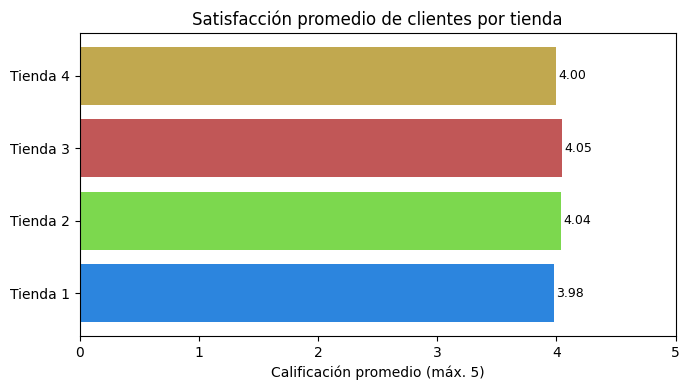

In [83]:
import matplotlib.pyplot as plt

# Promedios (estos valores deben haber sido calculados previamente)
calificaciones = [promedio1, promedio2, promedio3, promedio4]
tiendas = ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4']

# Colores tipo "satisfacción" (opcional: verdes/amarillos)
colores = ['#2C85DE', '#7CD84E', '#C15757', '#C1A84F']

plt.figure(figsize=(7, 4))
barras = plt.barh(tiendas, calificaciones, color=colores)

# Mostrar valores sobre las barras
for barra in barras:
    ancho = barra.get_width()
    plt.text(ancho + 0.02, barra.get_y() + barra.get_height()/2,
             f'{ancho:.2f}', va='center', fontsize=9)

plt.xlim(0, 5)  # escala de 0 a 5 estrellas
plt.xlabel('Calificación promedio (máx. 5)')
plt.title('Satisfacción promedio de clientes por tienda')
plt.tight_layout()
plt.show()


# 4. Productos más y menos vendidos

In [62]:
def mostrar_top_y_bottom(df, nombre_tienda):
    conteo = df['Producto'].value_counts()
    top = conteo.head(1)
    bottom = conteo.tail(1)

    print(f"\n{nombre_tienda}")
    print(f"Más vendido: {top.index[0]} ({top.values[0]} ventas)")
    print(f"Menos vendido: {bottom.index[0]} ({bottom.values[0]} venta{'s' if bottom.values[0] > 1 else ''})")
    print("\n::::::::::::::::::::::::::::::::::::::::::::::::::::")

mostrar_top_y_bottom(tienda1, "Tienda 1")
mostrar_top_y_bottom(tienda2, "Tienda 2")
mostrar_top_y_bottom(tienda3, "Tienda 3")
mostrar_top_y_bottom(tienda4, "Tienda 4")



Tienda 1
Más vendido: Microondas (60 ventas)
Menos vendido: Celular ABXY (33 ventas)

::::::::::::::::::::::::::::::::::::::::::::::::::::

Tienda 2
Más vendido: Iniciando en programación (65 ventas)
Menos vendido: Juego de mesa (32 ventas)

::::::::::::::::::::::::::::::::::::::::::::::::::::

Tienda 3
Más vendido: Kit de bancas (57 ventas)
Menos vendido: Bloques de construcción (35 ventas)

::::::::::::::::::::::::::::::::::::::::::::::::::::

Tienda 4
Más vendido: Cama box (62 ventas)
Menos vendido: Guitarra eléctrica (33 ventas)

::::::::::::::::::::::::::::::::::::::::::::::::::::


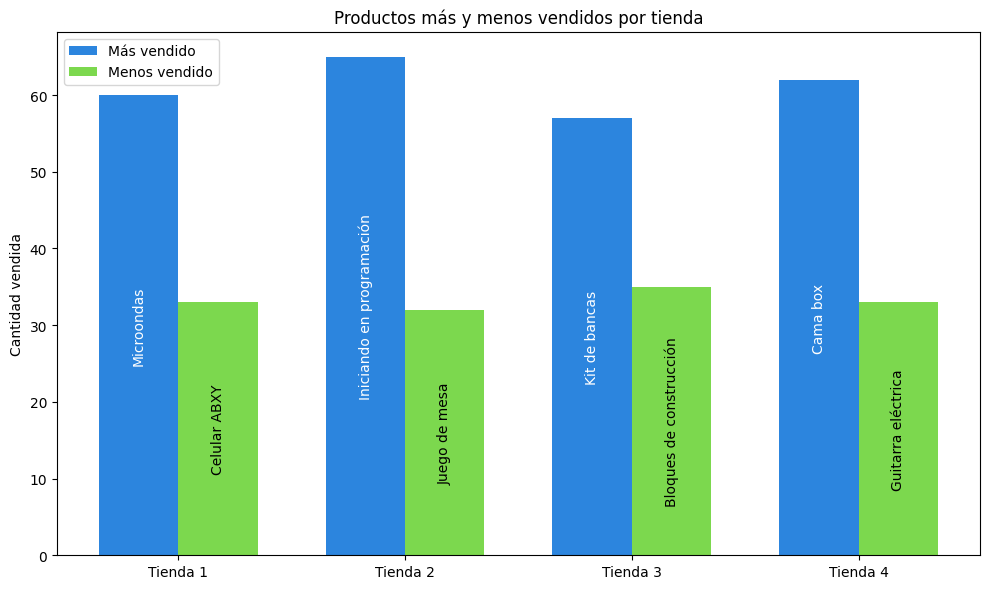

In [93]:
import matplotlib.pyplot as plt
import numpy as np

# Recopilamos los datos de la función
tiendas = {
    "Tienda 1": tienda1,
    "Tienda 2": tienda2,
    "Tienda 3": tienda3,
    "Tienda 4": tienda4
}

nombres_tienda = []
productos_mas = []
productos_menos = []
cantidades_mas = []
cantidades_menos = []

for nombre, df in tiendas.items():
    conteo = df['Producto'].value_counts()
    top = conteo.head(1)
    bottom = conteo.tail(1)

    nombres_tienda.append(nombre)
    productos_mas.append(top.index[0])
    cantidades_mas.append(top.values[0])
    productos_menos.append(bottom.index[0])
    cantidades_menos.append(bottom.values[0])

# Creamos el gráfico
x = np.arange(len(nombres_tienda))
width = 0.35

plt.figure(figsize=(10, 6))

# Colores personalizados
color_mas = '#2C85DE'
color_menos = '#7CD84E'

# Barras
barras_mas = plt.bar(x - width/2, cantidades_mas, width=width, color=color_mas, label='Más vendido')
barras_menos = plt.bar(x + width/2, cantidades_menos, width=width, color=color_menos, label='Menos vendido')

# Etiquetas dentro de las barras
for i in range(len(nombres_tienda)):
    # Dentro del más vendido
    plt.text(x[i] - width/2, cantidades_mas[i] / 2, productos_mas[i],
             ha='center', va='center', fontsize=10, color='white', rotation=90)

    # Dentro del menos vendido
    plt.text(x[i] + width/2, cantidades_menos[i] / 2, productos_menos[i],
             ha='center', va='center', fontsize=10, color='black', rotation=90)

plt.xticks(x, nombres_tienda)
plt.ylabel('Cantidad vendida')
plt.title('Productos más y menos vendidos por tienda')
plt.legend()
plt.tight_layout()
plt.show()




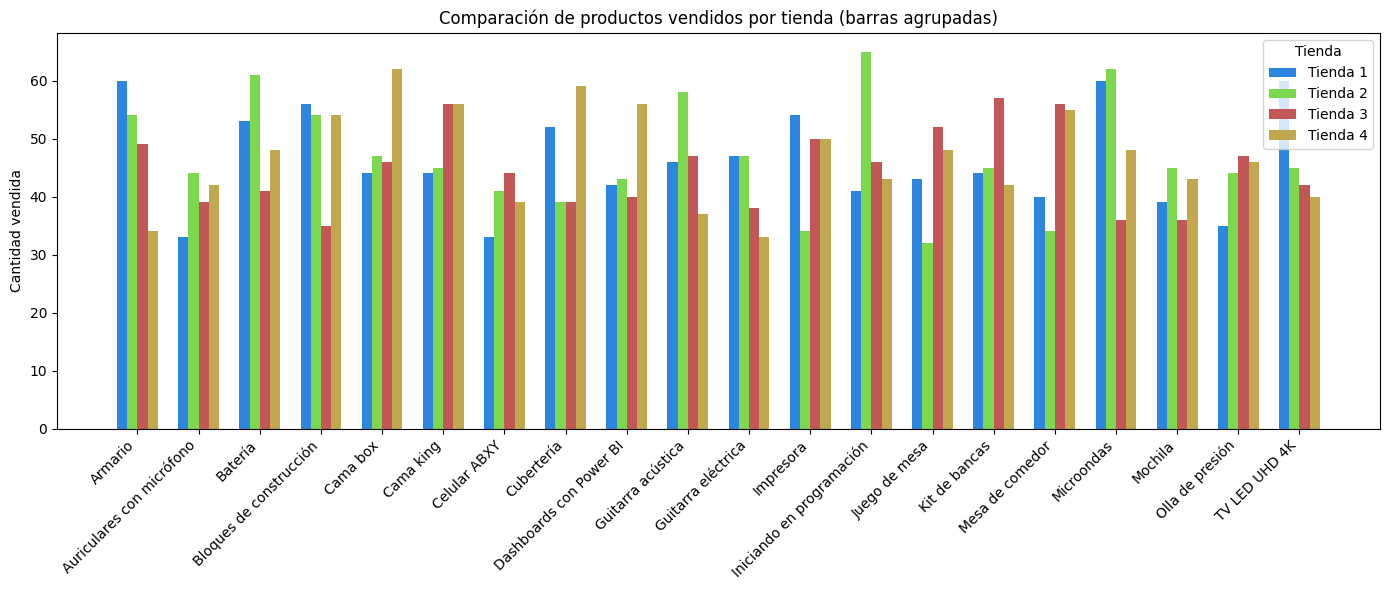

In [107]:
import numpy as np
import matplotlib.pyplot as plt

df_plot = df_comparativo.set_index('Producto')
productos = df_plot.index
tiendas = df_plot.columns
espacio = 0.4
x = np.arange(len(productos)) * (width * len(tiendas) + espacio)
width = 0.2

colores = ['#2C85DE', '#7CD84E', '#C15757', '#C1A84F']

plt.figure(figsize=(14, 6))

for i, tienda in enumerate(tiendas):
    plt.bar(x + i*width, df_plot[tienda], width=width, label=tienda, color=colores[i])

plt.xticks(x + (width * (len(tiendas) - 1)) / 2, productos, rotation=45, ha='right')
plt.ylabel('Cantidad vendida')
plt.title('Comparación de productos vendidos por tienda (barras agrupadas)')
plt.legend(title='Tienda')
plt.tight_layout()
plt.show()


# 5. Envío promedio por tienda